# US election 2024 analysis based on news headlines
In this project we have gathered the data of news headlines which talks about the political news of US from the trusted sources as 'The economic times', 'CNN' and 'fox news'.

**Data collection** - We have collected the data by scraping it from the web pages. for that BeautifulSoup library of python has been used.

In [ ]:
!pip install vaderSentiment

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
eco_times = 'https://economictimes.indiatimes.com/news/international/us-elections-news/newslist/77101863.cms?from=mdr'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(eco_times, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
data_1 = []
# Extract headlines or article links
for article in soup.find_all('h3'):
    headline1 = article.text.split(sep='[]')
    data_1.append(headline1)


#print (data_1)
a=pd.DataFrame(data_1)
a.head()

,0
0,"Kamala Harris, Donald Trump shift plans after ..."
1,Kamala Harris trolls Donald Trump at Vegas ral...
2,What to watch as JD Vance and Tim Walz meet fo...
3,Kamala Harris campaign raises $55 mn over two ...
4,Donald Trump escalates attacks on Harris' ment...


In [ ]:
fox_news = 'https://www.foxnews.com/politics'

# Set a User-Agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the URL
response = requests.get(fox_news, headers=headers)


# Check if the request was successful
if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
    headlines = soup.find_all('h2', class_='title')

    data_2 = []
    # Extract and print each headline text
    for idx, headlines in enumerate(headlines, start=1):
        headline2 = headlines.text.strip()
        #print(f"{idx}. {headline_text}")
        data_2.append(headline2)

else:
    print(f"Failed to retrieve content from Fox News. Status code: {response.status_code}")


#print(data_2)
b=pd.DataFrame(data_2)
b

,0
0,Thousands of noncitizens removed from voter ro...
1,Charlamagne Tha God praises Trump ad on Harris...
2,Rep Matt Gaetz wants to cut off federal aid to...
3,"Kamala Harris, Liz Cheney to stump at birthpla..."
4,Trump trails Harris by 4 points in Wisconsin: ...


In [ ]:
cnn_news = 'https://www.cnn.com/politics'

# Set a User-Agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the URL
response = requests.get(cnn_news, headers=headers)


# Check if the request was successful
if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
    headlines = soup.find_all('span', class_="container__headline-text")

    data_3 = []
    # Extract and print each headline text
    for idx, headlines in enumerate(headlines, start=1):
        headline3 = headlines.text.strip()
        #print(f"{idx}. {headline_text}")
        data_3.append(headline3)

else:
    print(f"Failed to retrieve content from Fox News. Status code: {response.status_code}")


#print(data_3)
c=pd.DataFrame(data_3)
c.head()

,0
0,Melania Trump confirms support for abortion ri...
1,Pence and Trump‚Äôs frayed relationship leadin...
2,Harris pushes to make health care a top campai...
3,Liz Cheney to campaign with Harris in battlegr...
4,Trump says he would revoke Temporary Protected...


In [ ]:
'''nnw_news = 'https://www.newsnationnow.com/politics/2024-election/'

# Set a User-Agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the URL
response = requests.get(nnw_news, headers=headers)


# Check if the request was successful
if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
    headlines = soup.find_all('div', class_ ="article-list__article article-list__article--is-stacked")

    data_4 = []
    # Extract and print each headline text
    for idx, headlines in enumerate(headlines, start=1):
        headline4 = headlines.text.strip()
        #print(f"{idx}. {headline_text}")
        data_4.append(headline4)

else:
    print(f"Failed to retrieve content . Status code: {response.status_code}")


#print(data_4)
d=pd.DataFrame(data_4)
d.head()'''

'nnw_news = \'https://www.newsnationnow.com/politics/2024-election/\'\n\n# Set a User-Agent to mimic a browser request\nheaders = {\n    \'User-Agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36\'\n}\n\n# Send a GET request to the URL\nresponse = requests.get(nnw_news, headers=headers)\n\n\n# Check if the request was successful\nif response.status_code == 200:\n\n    soup = BeautifulSoup(response.content, \'html.parser\')\n    headlines = soup.find_all(\'div\', class_ ="article-list__article article-list__article--is-stacked")\n\n    data_4 = []\n    # Extract and print each headline text\n    for idx, headlines in enumerate(headlines, start=1):\n        headline4 = headlines.text.strip()\n        #print(f"{idx}. {headline_text}")\n        data_4.append(headline4)\n\nelse:\n    print(f"Failed to retrieve content . Status code: {response.status_code}")\n\n\n#print(data_4)\nd=pd.DataFrame(data_4)\nd.head()'

In [ ]:
new_df = pd.DataFrame({'news': (data_1+data_2+data_3)})

# Append the new DataFrame to the existing one
#new_df= pd.concat((data_2, data_3), ignore_index=True)
new_df.head()

,news
0,"[Kamala Harris, Donald Trump shift plans after..."
1,[Kamala Harris trolls Donald Trump at Vegas ra...
2,[What to watch as JD Vance and Tim Walz meet f...
3,[Kamala Harris campaign raises $55 mn over two...
4,[Donald Trump escalates attacks on Harris' men...


**Data Preprocessing** - Now as we have the desired data, we will prepare the data for sentiment analysis. We will remove the punctuations and extra words.

In [ ]:
def clean_text(new_df):
    new_df = word_tokenize(new_df) # Create tokens

    new_df= " ".join(new_df) # Join tokens

    new_df = [char for char in new_df if char not in string.punctuation] # Remove punctuations

    new_df = "".join(new_df) #This joins the list of characters back into a string so that we can use split()
    new_df = [word for word in new_df.split() if word.lower() not in stopwords.words('english')] # Remove common english words (I, you, we,...)
    return " ".join(new_df)

In [ ]:
# Check for missing or non-string values in the 'news' column
print(new_df['news'].isnull().sum())  # Check how many NaN values exist
print(new_df['news'].apply(lambda x: isinstance(x, str)).value_counts())  # Check if all entries are strings


0
news
True     59
False    36
Name: count, dtype: int64


In [ ]:
new_df['news'] = new_df['news'].astype(str)


In [ ]:
new_df['cleaned_text']=new_df['news'].apply(clean_text)
new_df['cleaned_text'].head()

,cleaned_text
0,Kamala Harris Donald Trump shift plans Hurrica...
1,Kamala Harris trolls Donald Trump Vegas rally ...
2,watch JD Vance Tim Walz meet first vice presid...
3,Kamala Harris campaign raises 55 mn two weeken...
4,Donald Trump escalates attacks Harris mental f...


In [ ]:
features = new_df['cleaned_text']
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove single characters appearing in the text except the start
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters appearing at the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substitute multiple spaces with a single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Remove prefix 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Convert to lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
new_df['processed_text'] = processed_features
new_df.head()

,news,cleaned_text,processed_text
0,"[""Kamala Harris, Donald Trump shift plans afte...",Kamala Harris Donald Trump shift plans Hurrica...,kamala harris donald trump shift plans hurrica...
1,"[""Kamala Harris trolls Donald Trump at Vegas r...",Kamala Harris trolls Donald Trump Vegas rally ...,kamala harris trolls donald trump vegas rally ...
2,['What to watch as JD Vance and Tim Walz meet ...,watch JD Vance Tim Walz meet first vice presid...,watch jd vance tim walz meet first vice presid...
3,['Kamala Harris campaign raises $55 mn over tw...,Kamala Harris campaign raises 55 mn two weeken...,kamala harris campaign raises 55 mn two weeken...
4,"[""Donald Trump escalates attacks on Harris' me...",Donald Trump escalates attacks Harris mental f...,donald trump escalates attacks harris mental f...


In [ ]:
# Function to tag headlines by candidate
def tag_candidate(processed_text):
    if 'kamala harris' in processed_text.lower():
        return 'Kamala Harris'
    elif 'donald trump' in processed_text.lower():
        return 'Donald Trump'
    else:
        return None

# Apply the function to tag each headline with a candidate
new_df['candidate'] = new_df['news'].apply(tag_candidate)

new_df.head(10)

,news,cleaned_text,processed_text,candidate
0,"[""Kamala Harris, Donald Trump shift plans afte...",Kamala Harris Donald Trump shift plans Hurrica...,kamala harris donald trump shift plans hurrica...,Kamala Harris
1,"[""Kamala Harris trolls Donald Trump at Vegas r...",Kamala Harris trolls Donald Trump Vegas rally ...,kamala harris trolls donald trump vegas rally ...,Kamala Harris
2,['What to watch as JD Vance and Tim Walz meet ...,watch JD Vance Tim Walz meet first vice presid...,watch jd vance tim walz meet first vice presid...,None
3,['Kamala Harris campaign raises $55 mn over tw...,Kamala Harris campaign raises 55 mn two weeken...,kamala harris campaign raises 55 mn two weeken...,Kamala Harris
4,"[""Donald Trump escalates attacks on Harris' me...",Donald Trump escalates attacks Harris mental f...,donald trump escalates attacks harris mental f...,Donald Trump
5,"[""Some Republicans distance themselves from Tr...",Republicans distance Trump attack Harris menta...,republicans distance trump attack harris menta...,None
6,"[""Why Tuesday's vice presidential debate could...",Tuesday vice presidential debate could matter ...,tuesday vice presidential debate could matter ...,None
7,['VP Kamala Harris hits back: New TV ad mocks ...,VP Kamala Harris hits back New TV ad mocks Don...,vp kamala harris hits back new tv ad mocks don...,Kamala Harris
8,['Donald Trump lists his grievances in a Wisco...,Donald Trump lists grievances Wisconsin speech...,donald trump lists grievances wisconsin speech...,Donald Trump
9,"['Hot mics, no audience: Date, time, and other...",Hot mics audience Date time key rules VanceWal...,hot mics audience date time key rules vancewal...,None


**Now we will extract the sentiments from the text in the news based on the words used in it.**

In [ ]:
from textblob import TextBlob

In [ ]:
def generate_polarity(text):
    sentiment = TextBlob(text).sentiment
    return sentiment

In [ ]:
sentiment = new_df['processed_text'].apply(generate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()

,processed_text
0,"(0.0, 0.0)"
1,"(0.125, 0.55)"
2,"(0.25, 0.3333333333333333)"
3,"(0.0, 0.0)"
4,"(-0.1, 0.2)"


In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(processed_text):
    scores = analyzer.polarity_scores(processed_text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to get the sentiment for each headline
new_df['sentiment'] = new_df['processed_text'].apply(classify_sentiment)

print(new_df)

                                                 news  \
0   ["Kamala Harris, Donald Trump shift plans afte...   
1   ["Kamala Harris trolls Donald Trump at Vegas r...   
2   ['What to watch as JD Vance and Tim Walz meet ...   
3   ['Kamala Harris campaign raises $55 mn over tw...   
4   ["Donald Trump escalates attacks on Harris' me...   
..                                                ...   
90  Explore key dates, events and deadlines for th...   
91                            2024 elections glossary   
92  In pictures: The 2024 Democratic National Conv...   
93          In pictures: Vice President Kamala Harris   
94          In pictures: Harris running mate Tim Walz   

                                         cleaned_text  \
0   Kamala Harris Donald Trump shift plans Hurrica...   
1   Kamala Harris trolls Donald Trump Vegas rally ...   
2   watch JD Vance Tim Walz meet first vice presid...   
3   Kamala Harris campaign raises 55 mn two weeken...   
4   Donald Trump escalates att

In [ ]:
new_df.drop(columns=['news', 'cleaned_text'], inplace=True)
new_df.head()

,processed_text,candidate,sentiment
0,kamala harris donald trump shift plans hurrica...,Kamala Harris,negative
1,kamala harris trolls donald trump vegas rally ...,Kamala Harris,positive
2,watch jd vance tim walz meet first vice presid...,None,neutral
3,kamala harris campaign raises 55 mn two weeken...,Kamala Harris,neutral
4,donald trump escalates attacks harris mental f...,Donald Trump,negative


In [ ]:
def calculate_sentiment_distribution(new_df, candidate_name):
    candidate_data = new_df[new_df['candidate'] == candidate_name]
    total_articles = len(candidate_data)

    # Check if total_articles is zero to avoid division by zero
    if total_articles == 0:
        return {
            'positive': 0,
            'negative': 0,
            'neutral': 0
        }

    sentiment_counts = candidate_data['sentiment'].value_counts()
    positive_percentage = (sentiment_counts.get('positive', 0) / total_articles) * 100
    negative_percentage = (sentiment_counts.get('negative', 0) / total_articles) * 100
    neutral_percentage = (sentiment_counts.get('neutral', 0) / total_articles) * 100

    return {
        'positive': positive_percentage,
        'negative': negative_percentage,
        'neutral': neutral_percentage
    }

# Sentiment distribution for Kamala Harris
kamala_sentiments = calculate_sentiment_distribution(new_df, 'Kamala Harris')
print("Kamala Harris Sentiment Distribution:", kamala_sentiments)

# Sentiment distribution for Donald Trump
trump_sentiments = calculate_sentiment_distribution(new_df, 'Donald Trump')
print("Donald Trump Sentiment Distribution:", trump_sentiments)

Kamala Harris Sentiment Distribution: {'positive': 31.25, 'negative': 37.5, 'neutral': 31.25}
Donald Trump Sentiment Distribution: {'positive': 11.11111111111111, 'negative': 55.55555555555556, 'neutral': 33.33333333333333}


**We will plot the sentiments using a pie chart. Here are two pie charts one for each candidate which is showing the distribution of positive, negative and neutral sentiments.**

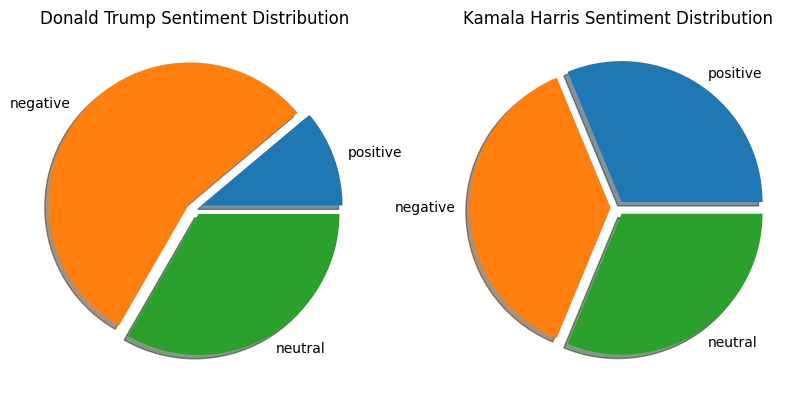

In [ ]:
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axis[0].pie(trump_sentiments.values(),labels=['positive','negative','neutral'],explode=[0.05,0.05,0.05],shadow=True)
axis[0].set_title("Donald Trump Sentiment Distribution")
axis[1].pie(kamala_sentiments.values(),labels=['positive','negative','neutral'],explode=[0.05,0.05,0.05],shadow=True)
axis[1].set_title("Kamala Harris Sentiment Distribution")
plt.show()

**Conclusion** - From the news, we can extract the sentiments using the words and analyse it whether it is positive, negative and neutral.

In [ ]:
kamala = kamala_sentiments.values()
trump = trump_sentiments.values()

print(kamala)
print(trump)

dict_values([31.25, 37.5, 31.25])
dict_values([11.11111111111111, 55.55555555555556, 33.33333333333333])


In [ ]:


kamala_float = [float(value) for value in kamala]
trump_float = [float(value) for value in trump]

print(kamala_float)
print(trump_float)


[31.25, 37.5, 31.25]
[11.11111111111111, 55.55555555555556, 33.33333333333333]


**Now we are creating a machine learning regression model using the random forest algorithm which will predict the output based on the above sentiment score.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



data = pd.DataFrame({
    'candidate': ['Kamala Harris', 'Donald Trump', 'Kamala Harris', 'Donald Trump'],
    'sentiment_score': [np.mean(kamala_float), np.mean(trump_float), np.mean(kamala_float), np.mean(trump_float)],
    'historical_win_rate': [0.55, 0.45, 0.6, 0.4],  # Based on previous elections/polls
    'polls': [0.58, 0.42, 0.59, 0.41],  # Polling data as a feature
    'win_percentage': [0.60, 0.40, 0.65, 0.35]  # Actual winning chances in the past
})

# Separate features (X) and target (y)
X = data[['sentiment_score', 'historical_win_rate', 'polls']]
y = data['win_percentage']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125, random_state=42)

# Initialize a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
print("Model training completed!")

# Make separate predictions for each candidate
def predict_winning_chances(candidate_data, candidate_name):
    # Predict the winning chance percentage
    winning_chance = model.predict(candidate_data)
    print(f"Predicted Winning Chance for {candidate_name}: {winning_chance[0]*100:.2f}%")

# Candidate-specific feature data
kamala_data = pd.DataFrame({
    'sentiment_score': [0.8],   # Positive sentiment for Kamala Harris
    'historical_win_rate': [0.55],  # Historical data
    'polls': [0.6]              # Polling data
})

trump_data = pd.DataFrame({
    'sentiment_score': [-0.1],  # Negative sentiment for Trump
    'historical_win_rate': [0.45],  # Historical data
    'polls': [0.4]              # Polling data
})

# Predict separately for each candidate
predict_winning_chances(kamala_data, "Kamala Harris")
predict_winning_chances(trump_data, "Donald Trump")



Model training completed!
Predicted Winning Chance for Kamala Harris: 61.20%
Predicted Winning Chance for Donald Trump: 42.20%


Predicted Winning Chance for Kamala Harris: 61.20%
Predicted Winning Chance for Donald Trump: 42.20%


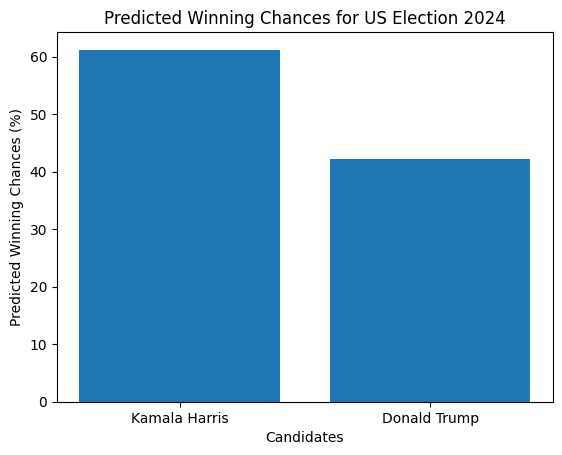

In [ ]:
import matplotlib.pyplot as plt


def predict_winning_chances(candidate_data, candidate_name):
    # Predict the winning chance percentage
    winning_chance = model.predict(candidate_data)
    print(f"Predicted Winning Chance for {candidate_name}: {winning_chance[0]*100:.2f}%")
    return winning_chance[0]*100 # Return the calculated value

predicted_chances = {
    "Kamala Harris": predict_winning_chances(kamala_data, "Kamala Harris"),
    "Donald Trump": predict_winning_chances(trump_data, "Donald Trump")
}

# Create a bar graph
plt.bar(predicted_chances.keys(), predicted_chances.values())

# Add labels and title
plt.xlabel("Candidates")
plt.ylabel("Predicted Winning Chances (%)")
plt.title("Predicted Winning Chances for US Election 2024")

# Show the plot
plt.show()